In [42]:
import sys
import pandas as pd
from shutil import copyfile
import cv2
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import sys
import os
import glob
sys.path.append('..')
import string
import recognizer
import tmp

### Create translation maxtrix (to shift the image right by 6 pixels)

In [ ]:
tx_matrix = np.float32(np.array([1, 0, 5, 0, 1, 0]).reshape(2, 3))

### Translation of pixels from out of the image into image causes black pixels. Hence compute the inverse of the black filters by tranlating a white image and inverting it.

In [79]:
def translate_image(src_path):
    img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
    white_mask = cv2.warpAffine(np.ones_like(img) * 255, tx_matrix, dsize=(img.shape[1], img.shape[0]))
    white_mask = 255 - white_mask

    img = cv2.warpAffine(img, tx_matrix, dsize=(img.shape[1], img.shape[0]))
    img += white_mask
    cv2.imwrite(src_path, img)


In [61]:
list_font_png = tmp.recursive_find_files('../fonts', '.*png')

In [80]:
for path in list_font_png:
    translate_image(path)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.25,
        horizontal_flip=False,
        fill_mode='nearest')

for path in list_font_png:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    cat = os.path.basename(os.path.dirname(path))
    x = img
    x = x[np.newaxis, :, :, np.newaxis]
    i = 0
    target_dir = os.path.join('/home/gopik/github/cnn/fonts/train', cat)
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)
    for batch in datagen.flow(x, ['0'], batch_size=1,   shuffle=True):
        aug_img = batch[0][0].reshape(40, 30)
        i += 1
        if i > 1000:
            break  # otherwise the generator would loop indefinitely
        
        file_path = os.path.join(target_dir, str(i) + '.jpeg')
        cv2.imwrite(file_path , aug_img)

In [73]:
import string
path = '/home/gopik/github/cnn/fonts/train/labels.txt'
def write_labels(path):
    labels = string.digits + string.ascii_uppercase
    with open(path, 'w') as f:
        for l in labels:
            f.write(l)
            f.write('\n')

In [44]:
lot1_files = tmp.recursive_find_files('../data/lot1', '.*recog.*jpg')

In [59]:
path = pd.Series(lot1_files)

In [57]:
basename = s.apply(lambda p: os.path.basename(p))

In [60]:
cat = basename.str.split('_').str[1]

In [63]:
df = pd.DataFrame({'path': path, 'basename': basename, 'cat':cat})

In [72]:
def copy_file(base, cat, src):
    target_dir = os.path.join(base, cat)
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)
    dst = os.path.join(target_dir, os.path.basename(src))
    copyfile(dst=dst, src=src)
    
df = df.apply(lambda row: copy_file('/home/gopik/github/cnn/data/lot1/train', row['cat'], row['path']), axis=1)
        

In [ ]:
tx_matrix = np.array([1, 0, 6, 0, 1, 1]).reshape(2, 3)

In [169]:
img_tx = cv2.warpAffine(img, np.float32(tx_matrix), dsize=(img.shape[1], img.shape[0]))

In [132]:
import shutil

In [135]:
for c in string.ascii_uppercase + string.digits:
    target_dir = os.path.join('/home/gopik/github/cnn/fonts/arial_35/', c)
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)
    if not os.path.exists(target_dir + "/" + c + ".png"):
        shutil.move('/home/gopik/github/cnn/fonts/arial_35/' + c + '.png', target_dir)
        

In [55]:
import importlib

In [74]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
    .   @brief Resizes an image.
    .   
    .   The function resize resizes the image src down to or up to the specified size. Note that the
    .   initial dst type or size are not taken into account. Instead, the size and type are derived from
    .   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
    .   you may call the function as follows:
    .   @code
    .   // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    .   resize(src, dst, dst.size(), 0, 0, interpolation);
    .   @endcode
    .   If you want to decimate the image by factor of 2 in each direction, you can call the function this
    .   way:
    .   @code
    .   // specify fx and fy and let the function compute the destination image size.
    .   resize(src, dst, Size(), 0.5, 0.5, interpolation);
    .   @endcode
    .   To shrin

In [119]:
importlib.reload(tmp)

<module 'tmp' from '../tmp.py'>

In [120]:
f = tmp.Frame(orginal_dir_list[0])

In [13]:
orginal_dir_list = map(lambda f: os.path.dirname(f), glob.glob(os.path.join('../data/lot1', '**/orginal.jpg'), recursive=True))

In [14]:
orginal_dir_list = list(orginal_dir_list)

In [15]:
orginal_dir_list[:5]

['../data/lot1/outputs/new2/frames/1432',
 '../data/lot1/outputs/new2/frames/1481',
 '../data/lot1/outputs/new2/frames/1425',
 '../data/lot1/outputs/new2/frames/1478',
 '../data/lot1/outputs/new2/frames/1452']

In [121]:
crops = f.get_orig_crop()
k = list(crops)[0]

TypeError: Required argument 'type' (pos 4) not found

In [95]:
help(cv2.adaptiveThreshold)

Help on built-in function adaptiveThreshold:

adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
    .   @brief Applies an adaptive threshold to an array.
    .   
    .   The function transforms a grayscale image to a binary image according to the formulae:
    .   -   **THRESH_BINARY**
    .   \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
    .   -   **THRESH_BINARY_INV**
    .   \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
    .   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
    .   
    .   The function can process the image in-place.
    .   
    .   @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @p

In [110]:
(cat, orig, img) = crops[k]

In [111]:
print(cat)

M


In [109]:
k = list(crops)[8]

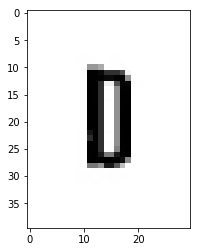

In [104]:
pyplot.imshow(img, cmap='gray')

In [106]:
for c, o, i in crops.values():
    cl = predict_img(i)
    print(c, cl)

D 0
U J
6 8
7 1
4 4
E L
3 J
9 3
M 0
2 2
3 3


In [114]:
k_img = cv2.imread(k, cv2.IMREAD_GRAYSCALE)

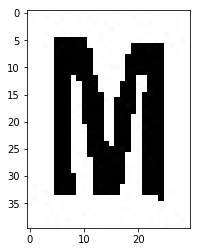

In [115]:
pyplot.imshow(k_img, cmap='gray')

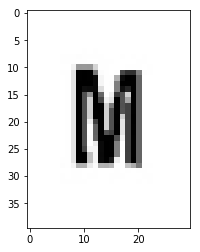

In [113]:
pyplot.imshow(img, cmap='gray')

In [48]:
classes = ['Unk'] + list(string.digits + string.ascii_uppercase)
rec = recognizer.Recognizer('../fonts/saved_model_5')
def predict_img(img, verbose=False):
    img = img[np.newaxis, :, :, np.newaxis]
    prediction = rec.predict(img)
    if verbose:
        print(prediction)
    return classes[np.argmax(prediction)]

def pedict_file(path, verbose=False):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return predict_img(img, verbose)

INFO:tensorflow:Restoring parameters from b'../fonts/saved_model_5/variables/variables'


INFO:tensorflow:Restoring parameters from b'../fonts/saved_model_5/variables/variables'


In [50]:
predict_img(img)

'0'

In [51]:
k

'../data/lot1/outputs/new2/frames/1432/chars/recognized_D_960_213_24_49.jpg'